Ïù¥ ÏΩîÎìúÏóêÏÑúÎäî Ï†ÄÏû• Í≥µÍ∞ÑÏùÑ Í∞ÄÏÉÅ Í≥µÍ∞ÑÏúºÎ°ú Îëî Í≤ÉÏù¥ ÏïÑÎãå,
ÎìúÎùºÏù¥Î∏å Î°úÏª¨ Í≥µÍ∞ÑÏúºÎ°ú Í≤ΩÎ°úÎ•º Î≥ÄÍ≤ΩÌïú Í≤ÉÏù¥Îã§.

Ïù¥ Ïù¥Ïú†Îäî ÌååÏùºÏùò Ïù¥Îèô Í≤ΩÎ°úÏôÄ Î™®Îç∏ ÌïôÏäµ ÏãúÏº∞ÏùÑ ÎïåÏùò Í≤∞Í≥ºÍ∞í ÌååÏùºÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÏù¥Îã§.

ÎòêÌïú detect.py ÌååÏùºÏùÑ ÏàòÏ†ïÌñàÏúºÎ©∞, ÏõêÎ≥∏ ÎòêÌïú Î≥¥Ï°¥ÎêòÏñ¥ÏûàÎã§.

ÏàòÏ†ïÎêú detect.pyÏóêÏÑúÎäî Ïó¨Îü¨ Í∞úÏùò Í∞ùÏ≤¥Í∞Ä Í≤ÄÏ∂úÎê† Í≤ΩÏö∞, Í∞ÄÏû• Ï§ëÏïôÏóê ÏûàÎäî Í∞ùÏ≤¥ ÌïòÎÇòÎßåÏùÑ ÏÑ†ÌÉùÌï¥, Ìï¥Îãπ Í∞ùÏ≤¥ÎßåÏùÑ Ïù∏ÏãùÌïòÏó¨ bounding box Ï≤òÎ¶¨ÌïòÎèÑÎ°ù ÌïòÏòÄÎã§.

# Î™®Îç∏ ÌïôÏäµ Ï†ÑÍπåÏßÄ

## ÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞ -> vsÏΩîÎìú ÌïÑÏöîX

In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('./MyDrive')

ModuleNotFoundError: No module named 'google'

## Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏÑ§Ï†ï

In [3]:
# yolov5 ÌÅ¥Î°† ÎÇ¥ ÎìúÎùºÏù¥Î∏å ÏïàÏóê ÏÑ§Ïπò
# git clone https://github.com/ultralytics/yolov5.git
# pip install -r yolov5/requirements.txt

# ÌïôÏäµ Ïù¥ÎØ∏ÏßÄ Î°úÎìú

In [2]:
# Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Î°úÎìú
import os
from glob import glob

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
all_list = glob(os.path.join('data_ver3_all', 'images', '*.jpg')) + glob(os.path.join('data_ver3_all', 'images', '*.png'))
all_txt = glob(os.path.join('data_ver3_all', 'labels', '*.txt'))

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Ïàò Ï∂úÎ†•
print(len(all_list))
print(len(all_txt))

# data.yaml ÌååÏùº ÎÇ¥Ïö© ÌôïÏù∏
data_yaml_path = os.path.join('data_ver3_all', 'data.yaml')
with open(data_yaml_path, 'r') as file:
    data_yaml_content = file.read()
    print(data_yaml_content)

919
919
names:
- aloe
- bacchus
- cider
- coca
- coco1
- coco2
- coffee
- confid
- demi
- fanta
- maesil
- mango
- olatte
- orange
- peach
- pocari
- sikhye1
- sikhye2
nc: 18
train: data_ver3_all/train.txt
val: data_ver3_all/val.txt



## test, validation set Î∂ÑÎ¶¨

In [4]:
#pip install scikit-learn

In [5]:
# train setÏôÄ validation setÏúºÎ°ú ÎÇòÎààÎã§.
from sklearn.model_selection import  train_test_split
train_img_list, val_img_list = train_test_split(all_list, test_size=0.2, random_state=42)

print(len(train_img_list), len(val_img_list))

735 184


## Ïù¥ÎØ∏ÏßÄ Ï†ïÎ¶¨

In [6]:
#pip install pyyaml

In [6]:
# train imgÏôÄ val img Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º txt ÌååÏùºÎ°ú Ï†ÄÏû•
with open('data_ver3_all/train.txt', 'w') as f :  # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎì§Ïù¥ txtÌååÏùºÏóê Ìïú Ï§ÑÏî© Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå
    f.write('\n'.join(train_img_list)+'\n')
with open('data_ver3_all/val.txt', 'w') as f :
    f.write('\n'.join(val_img_list)+'\n')

import yaml
with open('data_ver3_all/data.yaml', 'r') as f :
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data)

data['train'] = 'data_ver3_all/train.txt'
data['val'] = 'data_ver3_all/val.txt'

with open('data_ver3_all/data.yaml','w') as f :
    yaml.dump(data, f)

print(data)

{'names': ['aloe', 'bacchus', 'cider', 'coca', 'coco1', 'coco2', 'coffee', 'confid', 'demi', 'fanta', 'maesil', 'mango', 'olatte', 'orange', 'peach', 'pocari', 'sikhye1', 'sikhye2'], 'nc': 18, 'train': 'data_ver3_all/train.txt', 'val': 'data_ver3_all/val.txt'}
{'names': ['aloe', 'bacchus', 'cider', 'coca', 'coco1', 'coco2', 'coffee', 'confid', 'demi', 'fanta', 'maesil', 'mango', 'olatte', 'orange', 'peach', 'pocari', 'sikhye1', 'sikhye2'], 'nc': 18, 'train': 'data_ver3_all/train.txt', 'val': 'data_ver3_all/val.txt'}


# Î™®Îç∏ ÌõàÎ†®

## Î™®Îç∏ ÌõàÎ†® ÏãúÏûë

In [5]:
# ÌõàÎ†®ÏãúÌÇ§Í∏∞
%cd /content/MyDrive/MyDrive/Colab Notebooks/yolov5
!python train.py --img 560 --batch 16 --epochs 10 --data /content/MyDrive/MyDrive/"Colab Notebooks"/data_ver1_all/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results

/content/MyDrive/MyDrive/Colab Notebooks/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 882.0/882.0 kB 41.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-10-07 10:50:58.539541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 10:50:58.564040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 10:50:58.571583: E external/local_xla/xla/stre

In [7]:
#pip install comet-ml numpy torch torchvision torchaudio pyyaml tqdm

In [7]:
import os
import subprocess

# yolov5 ÎîîÎ†âÌÜ†Î¶¨Î°ú Ïù¥Îèô
os.chdir('C:/drive-download-20241007T143837Z-001/yolov5')

# YOLOv5 ÌõàÎ†® Ïã§Ìñâ
command = [
    'python', '-u', 'train.py',
    '--img', '480',
    '--batch', '16',
    '--epochs', '100',
    '--data', './data_ver3_all/data.yaml',
    '--cfg', './models/yolov5s.yaml',
    '--weights', 'yolov5s.pt',
    '--name', 'yolov5s_results',
    '--patience', '10'             # ÏÑ±Îä• Í∞úÏÑ†Ïù¥ ÏóÜÎäî Í≤ΩÏö∞ 10 ÏóêÌè¨ÌÅ¨ ÌõÑ Ï°∞Í∏∞ Ï¢ÖÎ£å
]

# Î™ÖÎ†π Ïã§Ìñâ Î∞è Ï∂úÎ†• ÌôïÏù∏
result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8', errors='ignore')

# Ï∂úÎ†• Í≤∞Í≥º ÌôïÏù∏
print("STDOUT:")
print(result.stdout)
print("STDERR:")
print(result.stderr)

STDOUT:
Error decoding JSON from C:\Users\ysmm0\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ysmm0\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

STDERR:
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./data_ver3_all/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smooth

## ÌÖêÏÑúÎ≥¥ÎìúÎ°ú ÌïôÏäµ Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
- Ïù¥Í±¥ ÏïàÎèºÎèÑ Ïã†Í≤Ω ÏïàÏç®ÎèÑ Îê®
- Ïó¨Í∏∞ Í¥ÄÎ†®Îêú ÌååÏùºÏùÄ "/content/MyDrive/MyDrive/Colab Notebooks/yolov5/runs/train/yolov5s_results(Ïà´Ïûê)/" Ìè¥ÎçîÏóê Îã§ Ï†ÄÏû•ÎèºÏûàÏùå

In [33]:
#pip install tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/MyDrive/MyDrive/Colab Notebooks/yolov5/runs/train/yolov5s_results3/

# Ï∂úÎ†• Í¥ÄÎ†® Î™®Îì† Î∂ÄÎ∂Ñ
- Í≤ÄÌÜ† ÏôÑÎ£å

## Ïò§ÎîîÏò§ Í¥ÄÎ†® pip

In [4]:
'''
pip install gTTS
pip install datasets
pip install utils
'''

'\npip install gTTS\npip install datasets\npip install utils\n'

In [1]:
# Ï∂úÎ†• Í≤∞Í≥ºÎ¨º : Ïù¥ÎØ∏ÏßÄ & ÏùåÏÑ±ÌååÏùº
from IPython.display import Image, Audio
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

## Í∞ùÏ≤¥ Í≤ÄÏ∂ú Í≤∞Í≥º ÌôïÏù∏ / ocr Í≤∞Í≥º

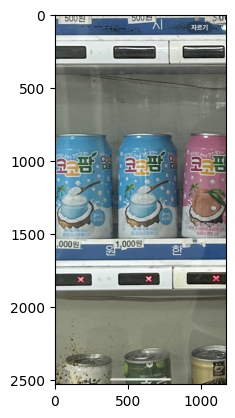

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

val_img_path =  "ocr_test2.jpg" # ÏòàÏ∏°ÌïòÍ≥† Ïã∂ÏùÄ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú ÏûÖÎ†•
result = img.imread(val_img_path)
plt.imshow(result)
plt.show()

In [34]:
# !python detect.py --weights /content/runs/train/yolov5s_results/weights/best.pt --img 560 --conf 0.5 --source "{val_img_path}"

import os

# ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
os.makedirs('yolov5/mp3', exist_ok=True) ## mp3 ÌååÏùº Îì§Ïñ¥Í∞ÄÎèÑÎ°ù ÎîîÎ†âÌÜ†Î¶¨ ÏÉàÎ°ú ÏÉùÏÑ±Ìï®

val_img_path = "ocr_test2.jpg"  # ÏòàÏ∏°ÌïòÍ≥† Ïã∂ÏùÄ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú ÏûÖÎ†•
# weights_path = '/content/MyDrive/MyDrive/Colab Notebooks/best.pt'  # Í∞ÄÏ§ëÏπò Í≤ΩÎ°ú -> 40 ÏóêÌè≠ÏúºÎ°ú ÏàòÌñâÌñàÎçò Í≤É
weights_path = "./yolov5/runs/train/yolov5s_results2/weights/best.pt"

!python ./yolov5/detect.py --weights "{weights_path}" --img 480 --conf 0.5 --source "{val_img_path}"



Ïù¥ ÏùåÎ£åÏàòÎäî  ÏΩîÏΩîÌåú ÏöîÍµ¨Î•¥Ìä∏  ÏûÖÎãàÎã§.
Í∞ÄÍ≤©ÏùÄ  1000Ïõê  ÏûÖÎãàÎã§.


detect: weights=['./yolov5/runs/train/yolov5s_results2/weights/best.pt'], source=ocr_test2.jpg, data=yolov5\data\coco128.yaml, imgsz=[480, 480], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-371-g6629839d Python-3.12.7 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
image 1/1 C:\drive-download-20241007T143837Z-001\ocr_test2.jpg: 480x224 28.6ms
Speed: 1.0ms pre-process, 28.6ms inference, 0.0ms NMS per image at shape (1, 3, 480, 480)
Results saved to yolov5\runs\detect\exp57

## Ïò§ÎîîÏò§ Î≥ÄÌôò Ï∂úÎ†•

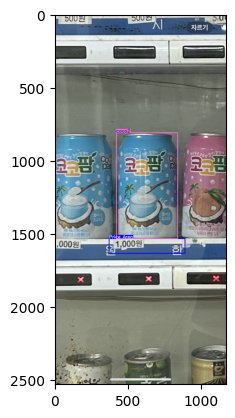

In [8]:
from IPython.display import Image, Audio
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

val_img_path = "ocr_test2.jpg" # ÏòàÏ∏°ÌïòÍ≥† Ïã∂ÏùÄ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú ÏûÖÎ†•

result = img.imread(os.path.join('./yolov5/runs/detect/exp57',os.path.basename(val_img_path)))
plt.imshow(result)
plt.show()
# time.sleep(5)

# Audio Í∞ùÏ≤¥ ÏÉùÏÑ±
audio_path = './yolov5/labelEN.mp3'

# ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
if os.path.exists(audio_path):
    display(Audio(audio_path, rate=44100, autoplay=True))
else:
    print("Audio file not found at:", audio_path)